Transformation of log of odds is logit function. Fitting of linear regression into logistic regression using logit function.

In [1]:
#loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# creating an array
x_array = np.linspace(-7,7,100)

In [3]:
x_array

array([-7.        , -6.85858586, -6.71717172, -6.57575758, -6.43434343,
       -6.29292929, -6.15151515, -6.01010101, -5.86868687, -5.72727273,
       -5.58585859, -5.44444444, -5.3030303 , -5.16161616, -5.02020202,
       -4.87878788, -4.73737374, -4.5959596 , -4.45454545, -4.31313131,
       -4.17171717, -4.03030303, -3.88888889, -3.74747475, -3.60606061,
       -3.46464646, -3.32323232, -3.18181818, -3.04040404, -2.8989899 ,
       -2.75757576, -2.61616162, -2.47474747, -2.33333333, -2.19191919,
       -2.05050505, -1.90909091, -1.76767677, -1.62626263, -1.48484848,
       -1.34343434, -1.2020202 , -1.06060606, -0.91919192, -0.77777778,
       -0.63636364, -0.49494949, -0.35353535, -0.21212121, -0.07070707,
        0.07070707,  0.21212121,  0.35353535,  0.49494949,  0.63636364,
        0.77777778,  0.91919192,  1.06060606,  1.2020202 ,  1.34343434,
        1.48484848,  1.62626263,  1.76767677,  1.90909091,  2.05050505,
        2.19191919,  2.33333333,  2.47474747,  2.61616162,  2.75

In [4]:
#applying sigmoid function
z = 1 / (1 + np.exp(-x_array))

In [5]:
z

array([9.11051194e-04, 1.04929612e-03, 1.20849325e-03, 1.39180981e-03,
       1.60288907e-03, 1.84592104e-03, 2.12572334e-03, 2.44783371e-03,
       2.81861552e-03, 3.24537821e-03, 3.73651433e-03, 4.30165529e-03,
       4.95184793e-03, 5.69975424e-03, 6.55987647e-03, 7.54881014e-03,
       8.68552699e-03, 9.99168994e-03, 1.14920016e-02, 1.32145869e-02,
       1.51914098e-02, 1.74587216e-02, 2.00575365e-02, 2.30341287e-02,
       2.64405363e-02, 3.03350596e-02, 3.47827268e-02, 3.98556989e-02,
       4.56335711e-02, 5.22035186e-02, 5.96602230e-02, 6.81055013e-02,
       7.76475461e-02, 8.83996772e-02, 1.00478499e-01, 1.14001359e-01,
       1.29083018e-01, 1.45831484e-01, 1.64342987e-01, 1.84696201e-01,
       2.06945849e-01, 2.31116029e-01, 2.57193653e-01, 2.85122575e-01,
       3.14799023e-01, 3.46069006e-01, 3.78728288e-01, 4.12525370e-01,
       4.47167650e-01, 4.82330593e-01, 5.17669407e-01, 5.52832350e-01,
       5.87474630e-01, 6.21271712e-01, 6.53930994e-01, 6.85200977e-01,
      

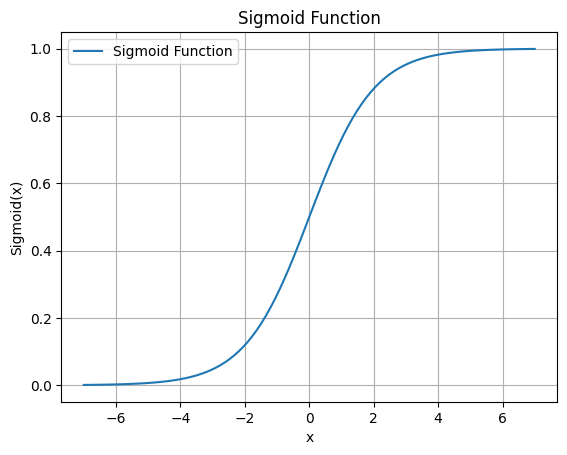

In [6]:
#plotting sigmoid function
plt.plot(x_array,z,label="Sigmoid Function")
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression

In [7]:
#Importing the data
loan_data = pd.read_excel("/content/loan_data.xlsx")

In [10]:
loan_data

,age,loan_probablity
0,45,1
1,10,0
2,18,0
3,66,1
4,32,1
5,22,0
6,34,1
7,17,0
8,87,1
9,67,1


In [9]:
# dropping one column of dataframe
loan_data.drop(columns=loan_data.columns[0], axis=1, inplace=True)


In [11]:
loan_data

,age,loan_probablity
0,45,1
1,10,0
2,18,0
3,66,1
4,32,1
5,22,0
6,34,1
7,17,0
8,87,1
9,67,1


In [12]:
x = loan_data[["age"]]

In [13]:
y = loan_data.iloc[:,1]

In [14]:
import numpy as np

# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to train the logistic regression model
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    '''
    X = features

    Y = True labels
    '''
    # Initialize weights and bias
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    # Training loop
    for _ in range(epochs):
        # linear data on input data X
        z = np.dot(X, weights) + bias
         # Convert to actual probability using sigmoid function
        probabilities = sigmoid(z)

        # Calculate errors
        errors = y - probabilities

        # Update weights and bias
        weights += learning_rate * np.dot(errors, X) / len(y)
        bias += learning_rate * np.sum(errors) / len(y)

    # Return the trained model parameters
    return weights, bias


# Function to make predictions
def predict(X, weights, bias):
    z = np.dot(X, weights.T) + bias
    probabilities = sigmoid(z)
    return probabilities


In [15]:
w,b = train_logistic_regression(x,y,0.001,100)

In [16]:
y_pred = predict(x,w,b)


In [17]:
y_pred

array([0.71347148, 0.54641326, 0.58714086, 0.79379814, 0.65534196,
       0.60710107, 0.66465243, 0.58210293, 0.8561461 , 0.79717323,
       0.7539453 , 0.55154998, 0.61203849, 0.5719765 , 0.57704781,
       0.5921606 ])

In [18]:
loan_data["p"] = y_pred

In [19]:
loan_data

,age,loan_probablity,p
0,45,1,0.713471
1,10,0,0.546413
2,18,0,0.587141
3,66,1,0.793798
4,32,1,0.655342
5,22,0,0.607101
6,34,1,0.664652
7,17,0,0.582103
8,87,1,0.856146
9,67,1,0.797173


In [20]:
# Add a new column '1_minus_p'
loan_data['1 - p'] = 1 - loan_data['p']

In [21]:
loan_data

,age,loan_probablity,p,1 - p
0,45,1,0.713471,0.286529
1,10,0,0.546413,0.453587
2,18,0,0.587141,0.412859
3,66,1,0.793798,0.206202
4,32,1,0.655342,0.344658
5,22,0,0.607101,0.392899
6,34,1,0.664652,0.335348
7,17,0,0.582103,0.417897
8,87,1,0.856146,0.143854
9,67,1,0.797173,0.202827


In [22]:
# Calculate the ratio p/(1-p) and add a new column 'p_ratio'
loan_data['p_ratio'] = loan_data['p'] / loan_data['1 - p']

In [23]:
loan_data

,age,loan_probablity,p,1 - p,p_ratio
0,45,1,0.713471,0.286529,2.490054
1,10,0,0.546413,0.453587,1.204650
2,18,0,0.587141,0.412859,1.422134
3,66,1,0.793798,0.206202,3.849617
4,32,1,0.655342,0.344658,1.901427
5,22,0,0.607101,0.392899,1.545184
6,34,1,0.664652,0.335348,1.981981
7,17,0,0.582103,0.417897,1.392934
8,87,1,0.856146,0.143854,5.951497
9,67,1,0.797173,0.202827,3.930316


In [24]:
# Calculate the logarithm of the ratio p/(1-p) and add a new column 'log_p_ratio'
loan_data['log_p_ratio'] = np.log(loan_data['p_ratio'])

In [25]:
loan_data

,age,loan_probablity,p,1 - p,p_ratio,log_p_ratio
0,45,1,0.713471,0.286529,2.490054,0.912304
1,10,0,0.546413,0.453587,1.204650,0.186189
2,18,0,0.587141,0.412859,1.422134,0.352158
3,66,1,0.793798,0.206202,3.849617,1.347974
4,32,1,0.655342,0.344658,1.901427,0.642604
5,22,0,0.607101,0.392899,1.545184,0.435143
6,34,1,0.664652,0.335348,1.981981,0.684097
7,17,0,0.582103,0.417897,1.392934,0.331412
8,87,1,0.856146,0.143854,5.951497,1.783643
9,67,1,0.797173,0.202827,3.930316,1.368720


In [26]:
# Apply sigmoid function to the log_p_ratio column and add a new column 'sigmoid_log_p_ratio'
loan_data['sigmoid_log_p_ratio'] = 1 / (1 + np.exp(-loan_data['log_p_ratio']))

In [27]:
loan_data

,age,loan_probablity,p,1 - p,p_ratio,log_p_ratio,sigmoid_log_p_ratio
0,45,1,0.713471,0.286529,2.490054,0.912304,0.713471
1,10,0,0.546413,0.453587,1.204650,0.186189,0.546413
2,18,0,0.587141,0.412859,1.422134,0.352158,0.587141
3,66,1,0.793798,0.206202,3.849617,1.347974,0.793798
4,32,1,0.655342,0.344658,1.901427,0.642604,0.655342
5,22,0,0.607101,0.392899,1.545184,0.435143,0.607101
6,34,1,0.664652,0.335348,1.981981,0.684097,0.664652
7,17,0,0.582103,0.417897,1.392934,0.331412,0.582103
8,87,1,0.856146,0.143854,5.951497,1.783643,0.856146
9,67,1,0.797173,0.202827,3.930316,1.368720,0.797173


In [28]:
# Sort the DataFrame by the 'age' column
loan_data = loan_data.sort_values(by='age')

In [29]:
loan_data

,age,loan_probablity,p,1 - p,p_ratio,log_p_ratio,sigmoid_log_p_ratio
1,10,0,0.546413,0.453587,1.204650,0.186189,0.546413
11,11,0,0.551550,0.448450,1.229903,0.206935,0.551550
13,15,0,0.571977,0.428023,1.336320,0.289920,0.571977
14,16,0,0.577048,0.422952,1.364333,0.310666,0.577048
7,17,0,0.582103,0.417897,1.392934,0.331412,0.582103
2,18,0,0.587141,0.412859,1.422134,0.352158,0.587141
15,19,0,0.592161,0.407839,1.451946,0.372904,0.592161
5,22,0,0.607101,0.392899,1.545184,0.435143,0.607101
12,23,0,0.612038,0.387962,1.577575,0.455889,0.612038
4,32,1,0.655342,0.344658,1.901427,0.642604,0.655342


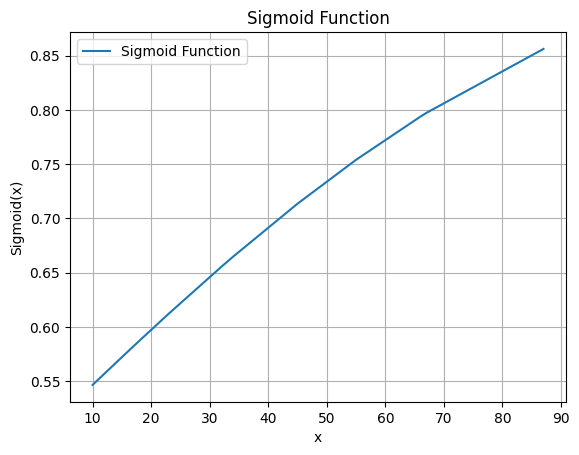

In [31]:
#plotting sigmoid function
plt.plot(loan_data["age"],loan_data["p"],label="Sigmoid Function")
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()